In [1]:
from IPython.display import Image


<h1>Ericson challenge</h1>
<p>&nbsp;</p>
<p>This is the coding file for this challenge</p>
<p>Hera I will explain my steps for solving this challenge</p>
<p>Notes:</p>
<ul>
<li>I hope this step was clear, I wish also to do more than I done ^_^</li>
</ul>
<p>At all thank you for this challenge</p>
<ul>
<li>Tools used in solving this challenge:</li>
</ul>
<p>-Python, tablue, excel(power query)</p>
<ul>
<li>In the Ericson note book I will explain every line of code and what it the code done but here I will explain the outline steps which I do in this challenge</li>
</ul>
<p>&nbsp;</p>
<h1>Steps for solving this challenge :</h1>
<p>Under standing the data set variables:</p>
<ul>
<li>the data set contain 8 variables</li>
<li>two date and time data type</li>
<li>3 Categorical variables (Alarm/Action&mdash;Degree-- KPI_Name)</li>
<li>3 Independent variables (Auto/Man-- description1- description2)</li>
</ul>
<p>The challenge is to predict the out came of the eNB logs from a real</p>
<p>telecom network</p>
<p>we have 10000 rows in this data set</p>
<p>only 730 have kpi</p>
<p>the 9270 is null have no kpi</p>
<p>&nbsp;</p>
<h1>cleaning step 1</h1>
<p>I make the EDA in Separated&nbsp;&nbsp; &nbsp;file using tablue with 10000 rows with some simple cleaning using excel</p>
<p><strong>Note:</strong> the clean challenge here is to Repair and approximation the kpi word to it right word, I use find and replace in excel</p>
<p>if we have huge data for that I use fuzzy wazzy tool in excel it is easy for that</p>
<h1>cleaning step 2</h1>
<p>clean the data using cleaning function (review_to_words)</p>
<p>to clean columns (Auto_Man, description1, description2)</p>
<p>then making extract for most words in this column and then use WordCloud library in python to visually this word</p>
<p>also used Tokenizer in keras library for count most words in the &nbsp;columns (Auto_Man, description1, description2)</p>
<h1>split step</h1>
<p>I split my data to train and test data set using power quary in excell</p>
<p>&nbsp;</p>
<h1>Data modeling and prediction methods</h1>
<p>The problem here is how to choose the right variable &nbsp;(Dependent variable) my outcome variable in our case column &nbsp;KPI_Name (y)</p>
<p>But what is the independent variable (x)?</p>
<p>From data expletory&nbsp; I noticed from next three &nbsp;pictures that&nbsp;&nbsp; :</p>
<ul>
<li>Alarm/action no affected in all kpi only two degrees(AL,VAL)</li>
<li>Auto/man affected in most kpi</li>
<li>degree not effected in most kpi</li>
</ul>
<p>so due to this notes is a classification challenge,</p>
<p>I used na&iuml;ve base algorithm</p>
<p>but the problem is I have many out puts</p>
<p>in na&iuml;ve base I used</p>
<p>&nbsp;&nbsp;<strong>Multinomial Naive Bayes</strong></p>
<p>&nbsp;for discrete features like output case &nbsp;</p>
<p>after using this algorithm i measure my accuracy by :</p>
<p>1-making different test split size to measure metrics accuracy score &nbsp;</p>
<p>2- using k-Fold Cross Validation for more accurate in my results</p>
<p>&nbsp;Also I used</p>
<p>&nbsp;<strong>Rnn </strong></p>
<p>here i try diifrent model with see how  multiple inputs and one out put to try to predict kpi name</p>
<p>I hope this explain what I done then I will explain more in my code</p>
<p>&nbsp;</p>
<p>Thanks</p>
<p>Best regards</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

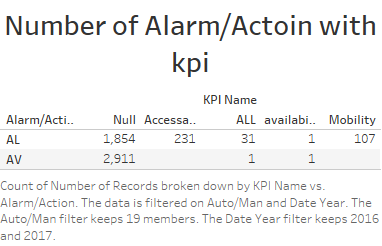

In [2]:
Image('C:/Ericsson/EDA/report/Number of Alarm-Actoin with kpi.png')


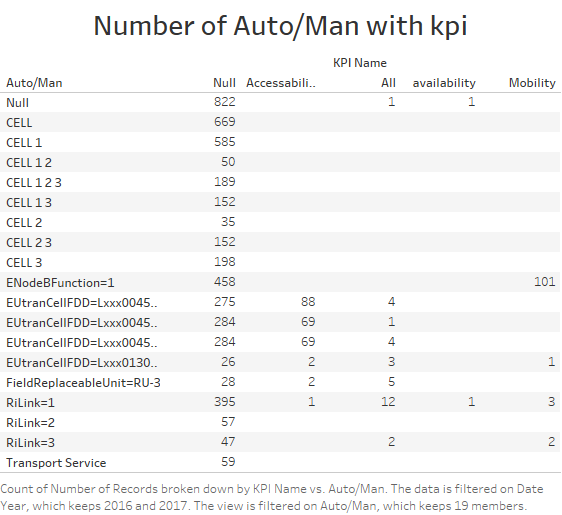

In [3]:
Image('C:/Ericsson/EDA/report/Number of Auto-Man with kpi.png')


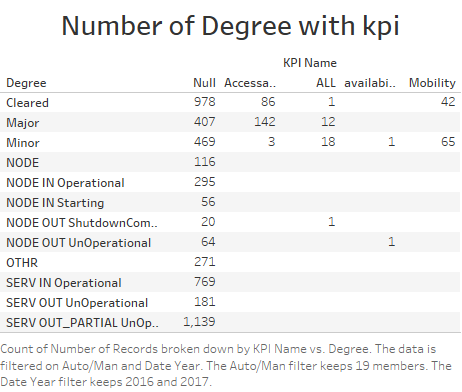

In [4]:
Image('C:/Ericsson/EDA/report/Number of Degree with kpi.png')

# 
<h1> The Challenge Code solution</h1>

In [5]:
#library used in the code
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from numpy import nan
from bs4 import BeautifulSoup    
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from math import sqrt
nltk.download('wordnet')
import tensorflow as tf


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hema\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hema\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
#read data set after firts clean in excell
data_set=pd.read_excel('c:/Ericsson/Dataset.xlsx')

In [7]:
data_set.head()

,Date,Time,Alarm/Action,Degree,Auto/Man,description1,description2,KPI_Name
0,2017-08-24,22:30:01,AV,SERV IN Operational,CELL,"Lrat Weighting factor: 33 percent, Existing C...",NaN,NaN
1,2017-03-25,12:11:14,AL,Major,EUtranCellFDD=Lxxx1563_15634_N_E_D1-4,PLMN Service Unavailable,PLMN mcc:xxx xx,Accessability
2,2017-08-28,06:51:51,AV,SERV IN Operational,CELL,"Lrat Weighting factor: 100 percent, Existing ...",NaN,NaN
3,2017-09-04,01:02:31,MO-N,INFO,"COMUser SET ManagedElement=Lxxx0144,ENodeBFunc...",NaN,NaN,Mobility
4,2017-10-10,13:46:51,MO-N,INFO,"COMUser SET ManagedElement=Lxxx2005,ENodeBFunc...",NaN,NaN,NaN


In [8]:
#some data set description and inforamtoins and group by with value count

In [9]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
Date            10000 non-null datetime64[ns]
Time            10000 non-null object
Alarm/Action    10000 non-null object
Degree          10000 non-null object
Auto/Man        9176 non-null object
description1    5749 non-null object
description2    2559 non-null object
KPI_Name        730 non-null object
dtypes: datetime64[ns](1), object(7)
memory usage: 625.1+ KB


In [10]:
data_set.describe()

,Date,Time,Alarm/Action,Degree,Auto/Man,description1,description2,KPI_Name
count,10000,10000,10000,10000,9176,5749,2559,730
unique,332,7211,4,19,3602,324,135,19
top,2017-08-02 00:00:00,10:32:51,MO-N,INFO,CELL,PLMN Service Unavailable,PLMN mcc:xxx xx,Mobility
freq,455,97,4036,4136,669,1063,1048,333
first,2016-11-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-11-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
Alarm_Action=data_set['Alarm/Action'].value_counts()

In [12]:
Alarm_Action

MO-N    4036
AV      3069
AL      2795
MO-C     100
Name: Alarm/Action, dtype: int64

In [13]:
Alarm_Action_percent = (data_set['Alarm/Action'].value_counts()/data_set['Alarm/Action'].count()*100).sort_values(ascending = False)


In [14]:
Alarm_Action_total=data_set['Alarm/Action'].value_counts().sort_values(ascending = False)

In [15]:
Alarm_Action_percentage= pd.concat([Alarm_Action_total,Alarm_Action_percent], axis=1, keys=['total_degree', 'degree_Percent'])
Alarm_Action_percentage.head()

,total_degree,degree_Percent
MO-N,4036,40.36
AV,3069,30.69
AL,2795,27.95
MO-C,100,1.00


In [16]:
#top 15
data_set.groupby(['Alarm/Action'])['Degree'].value_counts()[:15]

Alarm/Action  Degree                        
AL            Cleared                           1354
              Minor                              695
              Major                              691
              Warning                             50
              Critical                             5
AV            SERV OUT_PARTIAL UnOperational    1217
              SERV IN Operational                781
              NODE IN Operational                295
              OTHR                               271
              SERV OUT UnOperational             203
              NODE                               116
              NODE OUT UnOperational              65
              NODE IN Starting                    56
              NODE OUT ShutdownCommand            21
              PIU OUT ShutdownCommand             18
Name: Degree, dtype: int64

In [17]:
kpi_names=data_set['KPI_Name'].value_counts()

In [18]:
kpi_names

Mobility                             333
Accessability                        273
ALL                                   89
rrc connected user                     7
Traffic                                5
CSFB                                   4
Retainability / Mobility               3
cs fall back                           3
availability                           2
sc to wcdma                            2
session continuity to 3G               1
session continuity                     1
CBRA                                   1
sc                                     1
csfb                                   1
Retainability -Packet loss             1
Acessibilty - RRC Connected Users      1
Throughput                             1
DL Throughput                          1
Name: KPI_Name, dtype: int64

In [19]:
#see the percentage of the kpi_name

In [20]:
kpi_percent = (data_set['KPI_Name'].value_counts()/data_set['KPI_Name'].count()*100).sort_values(ascending = False)


In [21]:
kpi_total=data_set['KPI_Name'].value_counts().sort_values(ascending = False)

In [22]:
kpi_percentage= pd.concat([kpi_total,kpi_percent], axis=1, keys=['total_kpi', 'kpi_Percent'])
kpi_percentage.head(21)

,total_kpi,kpi_Percent
Mobility,333,45.616438
Accessability,273,37.397260
ALL,89,12.191781
rrc connected user,7,0.958904
Traffic,5,0.684932
CSFB,4,0.547945
Retainability / Mobility,3,0.410959
cs fall back,3,0.410959
availability,2,0.273973
sc to wcdma,2,0.273973


In [23]:
print ("Size of training data : ",data_set.shape)

Size of training data :  (10000, 8)


In [24]:
total=data_set.isnull().sum().sort_values(ascending = False)

In [25]:
total

KPI_Name        9270
description2    7441
description1    4251
Auto/Man         824
Degree             0
Alarm/Action       0
Time               0
Date               0
dtype: int64

In [26]:
#percentage of null values in the data set

In [27]:
percent = (data_set.isnull().sum()/data_set.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

,Total,Percent
KPI_Name,9270,92.70
description2,7441,74.41
description1,4251,42.51
Auto/Man,824,8.24
Degree,0,0.00


In [28]:
data_set.describe(include='all').T


,count,unique,top,freq,first,last
Date,10000,332,2017-08-02 00:00:00,455,2016-11-06 00:00:00,2017-11-15 00:00:00
Time,10000,7211,10:32:51,97,NaN,NaN
Alarm/Action,10000,4,MO-N,4036,NaN,NaN
Degree,10000,19,INFO,4136,NaN,NaN
Auto/Man,9176,3602,CELL,669,NaN,NaN
description1,5749,324,PLMN Service Unavailable,1063,NaN,NaN
description2,2559,135,PLMN mcc:xxx xx,1048,NaN,NaN
KPI_Name,730,19,Mobility,333,NaN,NaN


In [29]:
data_set.isnull().sum()

Date               0
Time               0
Alarm/Action       0
Degree             0
Auto/Man         824
description1    4251
description2    7441
KPI_Name        9270
dtype: int64

In [30]:
#function to clean the column Auto/Man,description1,description2 in the data set¶
#source ("https://www.kaggle.com/c/word2vec-nlp-tutorial")

In [31]:
def review_to_words(raw_review): 
    review =raw_review
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (' '.join(review))

In [32]:
#convert columns in string

In [33]:
num_AutoMan = data_set["Auto/Man"].size
num_description1=data_set["description1"].size
num_description2=data_set["description2"].size
KPI_Name_num=data_set["KPI_Name"].size

In [34]:
data_set['Auto/Man'] = data_set['Auto/Man'].astype(str)
data_set['description1'] = data_set['description1'].astype(str)
data_set['description2'] = data_set['description2'].astype(str)
data_set['KPI_Name'] = data_set['KPI_Name'].astype(str)

In [35]:
#convert clean data to list then merge it to data frame then delete the old columns

In [36]:
print ("Cleaning and parsing the column Auto_Man...\n")
Auto_Man= []
for i in range( 0, num_AutoMan ):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%1000 == 0 ):
        print ("Review %d of %d\n" % ( i+1, num_AutoMan ) )                                                                  
    Auto_Man.append(review_to_words(data_set['Auto/Man'][i]))

Cleaning and parsing the column Auto_Man...

Review 1000 of 10000

Review 2000 of 10000

Review 3000 of 10000

Review 4000 of 10000

Review 5000 of 10000

Review 6000 of 10000

Review 7000 of 10000

Review 8000 of 10000

Review 9000 of 10000

Review 10000 of 10000



In [37]:
print ("Cleaning and parsing the column description1...\n")
description1= []
for i in range( 0, num_description1 ):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%1000 == 0 ):
        print ("Review %d of %d\n" % ( i+1, num_description1 ) )                                                                  
    description1.append(review_to_words(data_set['description1'][i]))

Cleaning and parsing the column description1...

Review 1000 of 10000

Review 2000 of 10000

Review 3000 of 10000

Review 4000 of 10000

Review 5000 of 10000

Review 6000 of 10000

Review 7000 of 10000

Review 8000 of 10000

Review 9000 of 10000

Review 10000 of 10000



In [38]:
print ("Cleaning and parsing the column description2...\n")
description2= []
for i in range( 0, num_description2 ):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%1000 == 0 ):
        print ("Review %d of %d\n" % ( i+1, num_description2 ) )                                                                  
    description2.append(review_to_words(data_set['description2'][i]))

Cleaning and parsing the column description2...

Review 1000 of 10000

Review 2000 of 10000

Review 3000 of 10000

Review 4000 of 10000

Review 5000 of 10000

Review 6000 of 10000

Review 7000 of 10000

Review 8000 of 10000

Review 9000 of 10000

Review 10000 of 10000



In [39]:
print ("Cleaning and parsing the column KPI_Name...\n")
KPI_Name1= []
for i in range( 0,KPI_Name_num ):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%1000 == 0 ):
        print ("Review %d of %d\n" % ( i+1, KPI_Name_num ) )                                                                  
    KPI_Name1.append(review_to_words(data_set['KPI_Name'][i]))

Cleaning and parsing the column KPI_Name...

Review 1000 of 10000

Review 2000 of 10000

Review 3000 of 10000

Review 4000 of 10000

Review 5000 of 10000

Review 6000 of 10000

Review 7000 of 10000

Review 8000 of 10000

Review 9000 of 10000

Review 10000 of 10000



In [40]:
#creat new columns in the data set

In [41]:
data_set['new_Auto_Man']=Auto_Man
data_set['new_description1']=description1
data_set['new_description2']=description2
data_set['new_KPI_Name']=KPI_Name1


In [42]:
#delete old coumumns

In [43]:
data_set.drop(['Auto/Man','description1','description2','KPI_Name'],axis=1,inplace=True)

In [44]:
data_set.head()

,Date,Time,Alarm/Action,Degree,new_Auto_Man,new_description1,new_description2,new_KPI_Name
0,2017-08-24,22:30:01,AV,SERV IN Operational,cell,lrat weighting factor percent existing cellids,nan,nan
1,2017-03-25,12:11:14,AL,Major,eutrancellfdd lxxx n e,plmn service unavailable,plmn mcc xxx xx,accessability
2,2017-08-28,06:51:51,AV,SERV IN Operational,cell,lrat weighting factor percent existing cellids,nan,nan
3,2017-09-04,01:02:31,MO-N,INFO,comuser set managedelement lxxx enodebfunction...,nan,nan,mobility
4,2017-10-10,13:46:51,MO-N,INFO,comuser set managedelement lxxx enodebfunction...,nan,nan,nan


In [45]:
#reorder the data

In [46]:
new_data=data_set=data_set[['Date','Time','Alarm/Action','Degree','new_Auto_Man','new_description1','new_description2','new_KPI_Name']]

In [47]:
new_data.head()

,Date,Time,Alarm/Action,Degree,new_Auto_Man,new_description1,new_description2,new_KPI_Name
0,2017-08-24,22:30:01,AV,SERV IN Operational,cell,lrat weighting factor percent existing cellids,nan,nan
1,2017-03-25,12:11:14,AL,Major,eutrancellfdd lxxx n e,plmn service unavailable,plmn mcc xxx xx,accessability
2,2017-08-28,06:51:51,AV,SERV IN Operational,cell,lrat weighting factor percent existing cellids,nan,nan
3,2017-09-04,01:02:31,MO-N,INFO,comuser set managedelement lxxx enodebfunction...,nan,nan,mobility
4,2017-10-10,13:46:51,MO-N,INFO,comuser set managedelement lxxx enodebfunction...,nan,nan,nan


In [48]:
#use word cloud library for visualize the most words in the columns

In [49]:
words_Auto_Man = ' '.join(data_set['new_Auto_Man'])
split_word_Auto_Man= " ".join([word for word in words_Auto_Man.split()])

In [50]:
wordcloudword_Auto_Man = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(split_word_Auto_Man)

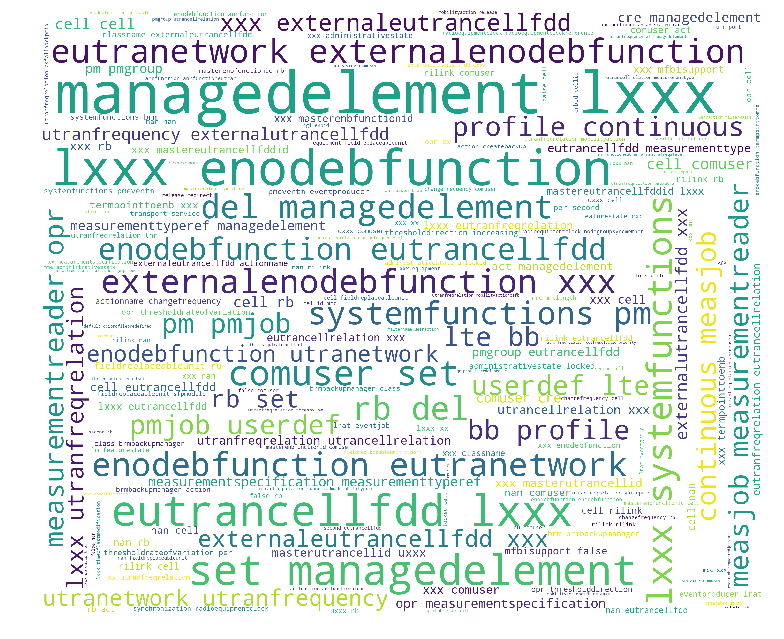

In [51]:
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloudword_Auto_Man)
plt.axis('off')
plt.show()

In [52]:
words_description1 = ' '.join(data_set['new_description1'])
split_description1= " ".join([word for word in words_description1.split()])

In [53]:
wordcloudword_description1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(split_description1)

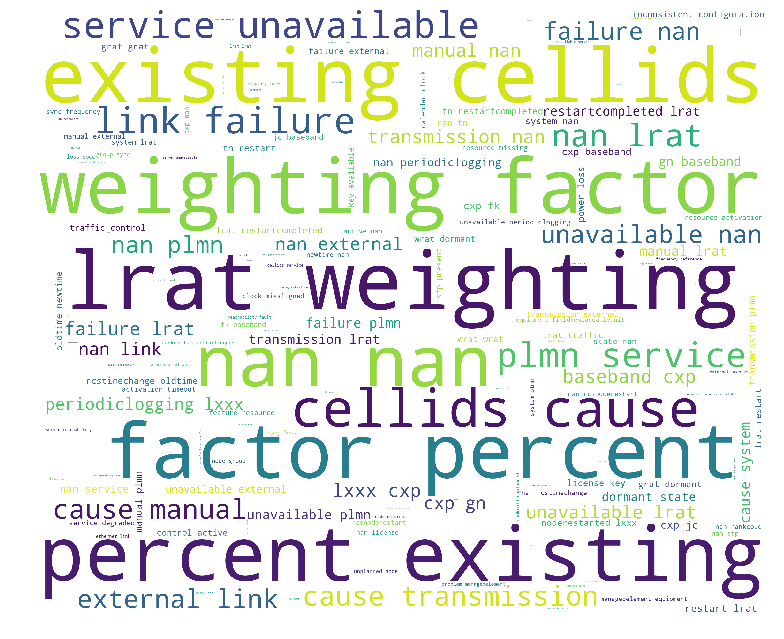

In [54]:
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloudword_description1)
plt.axis('off')
plt.show()

In [55]:
words_description2 = ' '.join(data_set['new_description2'])
split_description2= " ".join([word for word in words_description2.split()])

In [56]:
wordcloudword_description2 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(split_description2)

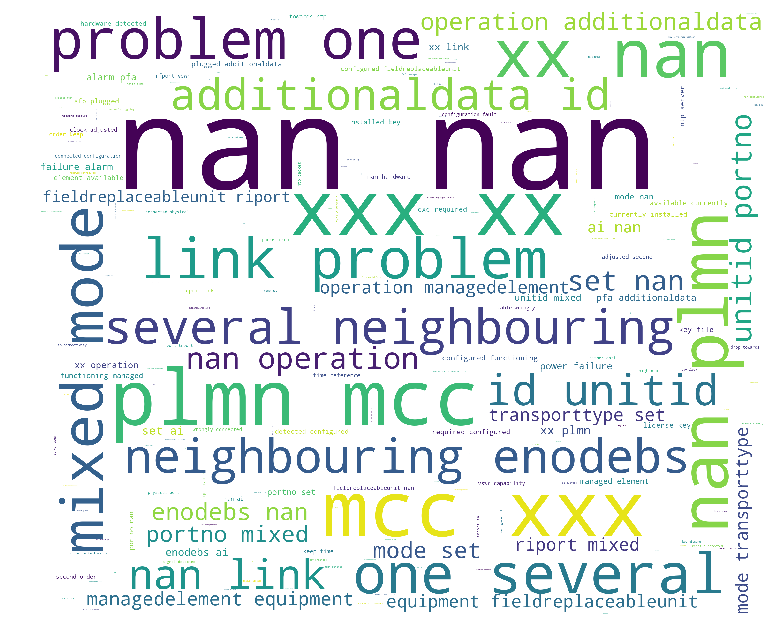

In [57]:
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloudword_description2)
plt.axis('off')
plt.show()

In [58]:
#use keras libarary to represnt word tokens
#source (https://keras.io/preprocessing/text/)

In [59]:
from keras.preprocessing.text import Tokenizer



Using TensorFlow backend.


In [60]:
new_Auto_Man_list=data_set['new_Auto_Man'].tolist()
new_description1_list=data_set['new_description1'].tolist()
new_description2_list=data_set['new_description2'].tolist()

In [61]:
# create the tokenizer
a_new_Auto_Man= Tokenizer()
# fit the tokenizer on the documents
a_new_Auto_Man.fit_on_texts(new_Auto_Man_list)
# summarize what was learned
word_docs_count_Auto_Man=a_new_Auto_Man.word_docs


In [62]:
word_docs_count_Auto_Man

{'act': 230,
 'action': 92,
 'actionname': 138,
 'activate': 1,
 'activated': 24,
 'active': 11,
 'activemanagedelement': 1,
 'administrativestate': 152,
 'alarmlog': 6,
 'alex': 4,
 'allowed': 1,
 'altcsfbtargetprio': 9,
 'altcsfbtargetprioec': 14,
 'always': 1,
 'amanagedelement': 1,
 'amoallowed': 1,
 'anrfunction': 41,
 'anrfunctioneutran': 24,
 'anrfunctionutran': 17,
 'anrinterfreqstate': 8,
 'anrintrafreqstate': 16,
 'anrmeason': 17,
 'anrstateutran': 17,
 'arfcnvalueutrandl': 1,
 'atoallowed': 13,
 'audittraillog': 6,
 'auto': 1,
 'autoprovisioning': 4,
 'b': 106,
 'baseband': 16,
 'bb': 878,
 'bmanagedelement': 1,
 'bp': 11,
 'brm': 76,
 'brmbackup': 12,
 'brmbackupmanager': 76,
 'brmfailsafebackup': 1,
 'c': 10,
 'cabinet': 4,
 'capable': 2,
 'capacity': 1,
 'cctrmanagedelement': 1,
 'cell': 2145,
 'cellfilter': 5,
 'cellid': 17,
 'cellidentity': 4,
 'cellindividualoffseteutran': 2,
 'cellreselectionpriority': 14,
 'cellyes': 2,
 'cellyesyes': 1,
 'cgi': 15,
 'changefrequency

In [63]:
b_new_description1=Tokenizer()
b_new_description1.fit_on_texts(new_description1_list)
# summarize what was learned
description1_count=b_new_description1.word_docs


In [64]:
description1_count

{'activation': 34,
 'active': 53,
 'allocation': 2,
 'available': 44,
 'baseband': 271,
 'bb': 11,
 'calendar': 35,
 'call': 1,
 'cause': 1420,
 'cell': 1,
 'cellids': 2089,
 'check': 4,
 'clock': 35,
 'close': 7,
 'completed': 1,
 'configuration': 55,
 'connection': 3,
 'control': 53,
 'cr': 2,
 'cxp': 271,
 'data': 4,
 'datarestore': 1,
 'degradation': 1,
 'degraded': 33,
 'dormant': 111,
 'due': 4,
 'e': 5,
 'emergency': 1,
 'enclosure': 4,
 'enodebfunction': 5,
 'equipment': 24,
 'error': 1,
 'ethernet': 15,
 'eutrancellfdd': 5,
 'existing': 2089,
 'expiration': 7,
 'external': 573,
 'extrestartrequest': 20,
 'extupgraderequest': 6,
 'factor': 2089,
 'failure': 1177,
 'fault': 18,
 'feature': 35,
 'fieldreplaceableunit': 24,
 'file': 5,
 'fk': 38,
 'frequency': 26,
 'g': 33,
 'gn': 121,
 'grat': 56,
 'group': 21,
 'high': 1,
 'inconsistent': 53,
 'jc': 42,
 'key': 57,
 'license': 56,
 'link': 1175,
 'loss': 86,
 'lrat': 2208,
 'lxxx': 275,
 'managedelement': 29,
 'manual': 628,
 'm

In [65]:
c_new_description1=Tokenizer()
c_new_description1.fit_on_texts(new_description2_list)
# summarize what was learned
description2_count=c_new_description1.word_docs


In [66]:
description2_count

{'access': 1,
 'activation': 1,
 'activity': 1,
 'adaptation': 2,
 'additionaldata': 456,
 'adjusted': 25,
 'ai': 250,
 'alarm': 74,
 'allocate': 2,
 'allocation': 1,
 'anr': 5,
 'automated': 1,
 'autorachrsalloc': 2,
 'available': 38,
 'availpowermw': 1,
 'b': 7,
 'baseband': 2,
 'basic': 4,
 'basis': 8,
 'bgm': 1,
 'c': 3,
 'cabinet': 2,
 'cable': 19,
 'capability': 22,
 'capacity': 3,
 'carrieraggregation': 4,
 'cell': 4,
 'climate': 2,
 'clock': 33,
 'configuration': 19,
 'configured': 83,
 'connected': 32,
 'connectivity': 11,
 'contact': 2,
 'control': 2,
 'cpri': 33,
 'cr': 1,
 'currently': 41,
 'cxc': 48,
 'cyclic': 10,
 'day': 8,
 'detected': 54,
 'drop': 14,
 'due': 2,
 'dynamicrabackoff': 1,
 'e': 6,
 'either': 13,
 'element': 46,
 'emergency': 1,
 'enhanced': 6,
 'enhancedpdcchla': 2,
 'enhcellidintraces': 2,
 'enodebfunction': 5,
 'enodebs': 554,
 'equipment': 204,
 'ethernet': 6,
 'eutrancellfdd': 5,
 'eventid': 6,
 'expired': 6,
 'external': 2,
 'f': 2,
 'failure': 66,
 

In [67]:
#export the data set into csv file then splite it using power query in excell

In [68]:
new_data.to_csv('C:\Ericsson\clean_Data.csv')

In [69]:
train_data=pd.read_excel('c:/Ericsson/train_data.xlsx')
test_data=pd.read_excel('c:/Ericsson/test_data.xlsx')

In [70]:
train_data.isnull().sum()

Column1               0
Date                  0
Time                  0
Alarm_Action          0
Degree                0
new_Auto_Man          2
new_description1    272
new_description2    317
new_KPI_Name          0
dtype: int64

In [71]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 9 columns):
Column1             730 non-null int64
Date                730 non-null datetime64[ns]
Time                730 non-null object
Alarm_Action        730 non-null object
Degree              730 non-null object
new_Auto_Man        728 non-null object
new_description1    458 non-null object
new_description2    413 non-null object
new_KPI_Name        730 non-null object
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 51.4+ KB


<h1>Data modeling and prediction methods</h1>


In [72]:
#in this problem we try to predecte the kpi due to data in the data set, 
#but what column make the kpi evaluatio, are one  coulmn or many columns 
#i try some soluntoins using one coulmn   as x  input value     and  many multiple inputs using ANN

<h2>prediction methods used</h2>

<ul>
  <li>Naive Bayes Classifiers using Multinomial Naive Bayes </li>
  <li>neural network (RNN)</li>
</ul>


<H1>1:Multinomial Naive Bayes</H1>

In [73]:
#Reading the dataset train and test set

In [74]:
train_data=pd.read_excel('c:/Ericsson/train_data.xlsx')
test_data=pd.read_excel('c:/Ericsson/test_data.xlsx')

In [75]:
#convert the columns in data frame to list for using it in the model

In [76]:
my_list1=train_data["new_Auto_Man"].tolist()
my_list2=test_data["new_Auto_Man"].tolist()
y = train_data["new_KPI_Name"]

In [77]:
#convert the train data to CountVectorizer('Auto_Man') to matrix of token counts

In [78]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)

x__train =cv.fit_transform(train_data['new_Auto_Man'].values.astype('U'))
x__test= cv.transform(test_data['new_Auto_Man'].values.astype('U'))



In [79]:
#split and test the data 

In [80]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x__train, y, test_size = 0.40)

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_real_pred = classifier.predict(x__test)



C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [81]:
from sklearn.metrics import confusion_matrix

print(":",confusion_matrix(y_test, y_pred))



: [[ 19  13   0   0   0   0   0   2   0   0   0   0   0   0]
 [  6  98   0   0   0   0   0   3   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  5   1   0   0   0   0   0 130   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   2   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   3   0   0   0   0   0   0]]


In [82]:
from sklearn import metrics
print(":", metrics.accuracy_score(y_test, y_pred))


: 0.8458904109589042


In [83]:
#it is Close to 1 i seems it is good for this little train set

In [84]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [85]:
accuracies.mean()



0.8740958994985686

In [86]:
#also here it is Close to 1 i seems it is good for this little train set

In [87]:
#source(http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

# 2_RNN MODEL


In [88]:
#delte 35 row

In [89]:
train_data_ANN=pd.read_excel('c:/Ericsson/train_data_Ann.xlsx')
test_data_ANN=pd.read_excel('c:/Ericsson/test_data _Ann.xlsx')

In [90]:
#convert catigory columns to number

In [91]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


In [92]:
#PROCESS CATEGORICAL DATA
print("Handling categorical variables...")
le = LabelEncoder()

le.fit(np.hstack([train_data_ANN.Alarm_Action, test_data_ANN.Alarm_Action]))
train_data_ANN.Alarm_Action = le.transform(train_data_ANN.Alarm_Action)
test_data_ANN.Alarm_Action = le.transform(test_data_ANN.Alarm_Action)

le.fit(np.hstack([train_data_ANN.Degree, test_data_ANN.Degree]))
train_data_ANN.Degree = le.transform(train_data_ANN.Degree)
test_data_ANN.Degree = le.transform(test_data_ANN.Degree)


del le


Handling categorical variables...


In [93]:
#coulnm new_KPI_Name dosent convert to so i try 
#this solution , assuimig that i delete unessary kpi and only left the most kpi counts (mobility)(accessability)(All)

# create new column with if and for loop with the new KPI_Name column

In [94]:
new_kpi_num=[]
for row in train_data_ANN['new_KPI_Name']:
    if row =="mobility":
        new_kpi_num.append(1)
    elif row == "accessability":
        new_kpi_num.append(2)
    elif row == "All":
        new_kpi_num.append(3)
    else:
        new_kpi_num.append(0)
train_data_ANN['new_kpi_num'] = new_kpi_num

In [95]:

train_data_ANN.head()

,Column1,Date,Time,Alarm_Action,Degree,new_Auto_Man,new_description1,new_description2,new_KPI_Name,new_kpi_num
0,1,2017-03-25,0.507801,0,4,eutrancellfdd lxxx n e,plmn service unavailable,plmn mcc xxx xx,accessability,2
1,3,2017-09-04,0.0434144,3,3,comuser set managedelement lxxx enodebfunction...,NaN,NaN,mobility,1
2,9,2017-09-07,0.270671,0,4,eutrancellfdd lxxx n e,plmn service unavailable,plmn mcc xxx xx,accessability,2
3,13,2017-07-31,0.506111,0,0,fieldreplaceableunit sfpmodule,sfp present,sfp plugged additionaldata id unitid portno,All,3
4,15,2017-09-07,0.146736,0,5,enodebfunction,external link failure,x link problem one several neighbouring enodebs,mobility,1


In [96]:

train_data_ANN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 10 columns):
Column1             695 non-null int64
Date                695 non-null datetime64[ns]
Time                695 non-null object
Alarm_Action        695 non-null int64
Degree              695 non-null int64
new_Auto_Man        694 non-null object
new_description1    449 non-null object
new_description2    405 non-null object
new_KPI_Name        695 non-null object
new_kpi_num         695 non-null int64
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 54.4+ KB


In [97]:
#PROCESS TEXT: RAW
print("Text to seq process...")
from keras.preprocessing.text import Tokenizer
raw_text = np.hstack([train_data_ANN.new_Auto_Man.str.lower()])
raw_text1 = np.hstack([test_data_ANN.new_Auto_Man.str.lower()])




Text to seq process...


In [98]:

#convert coulmns to list then to convert its datatype to string

In [99]:
ra1=raw_text.tolist()
ra2=raw_text1.tolist()

In [100]:
raa1=[str(i) for i in ra1]
raa2=[str(i) for i in ra2]

In [101]:
type(raa1)
type(raa2)

list

In [102]:
#making list word tokenze

In [103]:
print("   Fitting tokenizer...")
tok_raw = Tokenizer()
tok_raw.fit_on_texts(raa1)
tok_raw2 = Tokenizer()
tok_raw2.fit_on_texts(raa2)




   Fitting tokenizer...


In [104]:
from keras.preprocessing.sequence import pad_sequences


In [105]:
#making new column with its squenses from word to integer 

In [106]:
train_data_ANN["seq_Auto_Man"] =tok_raw.texts_to_sequences(raa1)
test_data_ANN["seq_Auto_Man"] = tok_raw2.texts_to_sequences(raa2)
train_data_ANN.head(3)

,Column1,Date,Time,Alarm_Action,Degree,new_Auto_Man,new_description1,new_description2,new_KPI_Name,new_kpi_num,seq_Auto_Man
0,1,2017-03-25,0.507801,0,4,eutrancellfdd lxxx n e,plmn service unavailable,plmn mcc xxx xx,accessability,2,"[4, 1, 3, 2]"
1,3,2017-09-04,0.0434144,3,3,comuser set managedelement lxxx enodebfunction...,NaN,NaN,mobility,1,"[32, 13, 7, 1, 5, 10, 11, 6, 59]"
2,9,2017-09-07,0.270671,0,4,eutrancellfdd lxxx n e,plmn service unavailable,plmn mcc xxx xx,accessability,2,"[4, 1, 3, 2]"


In [107]:
train_data_ANN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 11 columns):
Column1             695 non-null int64
Date                695 non-null datetime64[ns]
Time                695 non-null object
Alarm_Action        695 non-null int64
Degree              695 non-null int64
new_Auto_Man        694 non-null object
new_description1    449 non-null object
new_description2    405 non-null object
new_KPI_Name        695 non-null object
new_kpi_num         695 non-null int64
seq_Auto_Man        695 non-null object
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 59.8+ KB


In [108]:
#sequences variables analysis
max_name_seq = np.max([np.max(train_data_ANN.seq_Auto_Man.apply(lambda x: len(x))), np.max(test_data_ANN.seq_Auto_Man.apply(lambda x: len(x)))])

print("max name seq "+str(max_name_seq))


max name seq 146


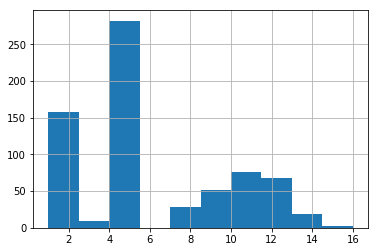

In [109]:
train_data_ANN.seq_Auto_Man.apply(lambda x: len(x)).hist()


In [110]:
#embeddings  to get max value

MAX_NAME_SEQ = 16
MAX_TEXT = np.max([np.max(train_data_ANN.seq_Auto_Man.max()),np.max(test_data_ANN.seq_Auto_Man.max())])+2
MAX_DEGREE = np.max([train_data_ANN.Degree.max(), test_data_ANN.Degree.max()])+1
MAX_Alarm_Action = np.max([train_data_ANN.Alarm_Action.max(), test_data_ANN.Alarm_Action.max()])+1


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C9E537FD68>]],
      dtype=object)

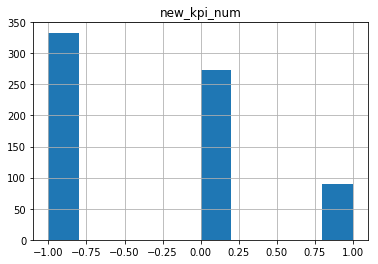

In [111]:
#SCALE kpi_num variable
train_data_ANN["new_kpi_num"] = np.log(train_data_ANN.new_kpi_num+1)
target_scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_ANN["new_kpi_num"] = target_scaler.fit_transform(train_data_ANN.new_kpi_num.reshape(-1,1))
pd.DataFrame(train_data_ANN.new_kpi_num).hist()

In [112]:
#extract developtment test

In [113]:

dtrain, dvalid = train_test_split(train_data_ANN,random_state=123, train_size=0.50)
print(dtrain.shape)
print(dvalid.shape)

(347, 11)
(348, 11)


In [114]:
#keras data definition

In [115]:

from keras.preprocessing.sequence import pad_sequences

def get_keras_data(dataset):
    X = {
        'name': pad_sequences(dataset.seq_Auto_Man, maxlen=MAX_NAME_SEQ),
        'Degree': np.array(dataset.Degree),
        'Alarm_Action': np.array(dataset.Alarm_Action)
    }
    return X
x = get_keras_data(dtrain)
X_valid = get_keras_data(dvalid)
X_test = get_keras_data(test_data_ANN)

In [116]:
#bulding keras model


In [117]:
from keras.layers import Input, Dropout, Dense, BatchNormalization, Activation, concatenate, GRU, Embedding, Flatten, BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras import backend as K

def get_callbacks(filepath, patience=2):
    es = EarlyStopping('val_loss', patience=patience, mode="min")
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [es, msave]

def rmsle_cust(y_true, y_pred):
    first_log = K.log(K.clip(y_pred, K.epsilon(), None) + 1.)
    second_log = K.log(K.clip(y_true, K.epsilon(), None) + 1.)
    return K.sqrt(K.mean(K.square(first_log - second_log), axis=-1))

def get_model():
    #params
    dr_r = 0.1
    
    
    #Inputs
    name = Input(shape=[x["name"].shape[1]], name="name")
    Degree = Input(shape=[1], name="Degree")
    Alarm_Action = Input(shape=[1], name="Alarm_Action")
    
    #Embeddings layers
    emb_name = Embedding(MAX_TEXT, 10)(name)
    emb_Degree = Embedding(MAX_DEGREE, 10)(Degree)
    emb_Alarm_Action = Embedding(MAX_Alarm_Action, 5)(Alarm_Action)
    
    #rnn layer
    rnn_layer1 = GRU(16) (emb_name)
 
    #main layer
    main_l = concatenate([
        Flatten() (emb_Degree)
        ,Flatten() (emb_Alarm_Action)
        ,rnn_layer1
    ])
    main_l = Dropout(dr_r) (Dense(128) (main_l))
    main_l = Dropout(dr_r) (Dense(64) (main_l))
    
    #output
    output = Dense(1, activation="linear") (main_l)
    
    #model
    model = Model([name, Degree,Alarm_Action], output)
    model.compile(loss="mse", optimizer="adam", metrics=["mae", rmsle_cust])
    
    return model

    
model = get_model()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Degree (InputLayer)             (None, 1)            0                                            
__________________________________________________________________________________________________
Alarm_Action (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
name (InputLayer)               (None, 16)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 10)        190         Degree[0][0]                     
__________________________________________________________________________________________________
embedding_

In [118]:

#FITTING THE MODEL
BATCH_SIZE = 20000
epochs =5

model = get_model()


In [119]:
model.fit(x, dtrain.new_kpi_num, epochs=epochs,
          batch_size=BATCH_SIZE , 
          validation_data=(X_valid,dvalid.new_kpi_num))

Train on 347 samples, validate on 348 samples
Epoch 1/5
347/347 [==============================] - 1s 3ms/step - loss: 0.6345 - mean_absolute_error: 0.6789 - rmsle_cust: 0.1640 - val_loss: 0.6306 - val_mean_absolute_error: 0.6939 - val_rmsle_cust: 0.1507
Epoch 2/5
347/347 [==============================] - 0s 114us/step - loss: 0.5985 - mean_absolute_error: 0.6671 - rmsle_cust: 0.1507 - val_loss: 0.5979 - val_mean_absolute_error: 0.6821 - val_rmsle_cust: 0.1507
Epoch 3/5
347/347 [==============================] - 0s 98us/step - loss: 0.5706 - mean_absolute_error: 0.6587 - rmsle_cust: 0.1501 - val_loss: 0.5677 - val_mean_absolute_error: 0.6701 - val_rmsle_cust: 0.1507
Epoch 4/5
347/347 [==============================] - 0s 102us/step - loss: 0.5406 - mean_absolute_error: 0.6475 - rmsle_cust: 0.1501 - val_loss: 0.5395 - val_mean_absolute_error: 0.6574 - val_rmsle_cust: 0.1507
Epoch 5/5
347/347 [==============================] - 0s 99us/step - loss: 0.5156 - mean_absolute_error: 0.6376 - 

In [120]:

#evaluate the model using mean squreerore

In [121]:

val_preds = model.predict(X_valid)
val_preds = target_scaler.inverse_transform(val_preds)
val_preds = np.exp(val_preds)+1


In [122]:


y_true = np.array(dvalid.new_kpi_num.values)
y_pred = val_preds[:,0]


In [123]:
from sklearn.metrics import mean_squared_error

In [124]:
mean_squared_error(y_true, y_pred)

16.29140910466402

In [126]:
#this is what i try for NOW the mean squre is big (15)so i wil try deffrent batch sizes, aso use lstm for more accurty

In [127]:
#thank you 